In [15]:
import numpy as np

In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

C:\Users\tomar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


17465344/17464789 [==============================] - 5s 0us/step


In [17]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

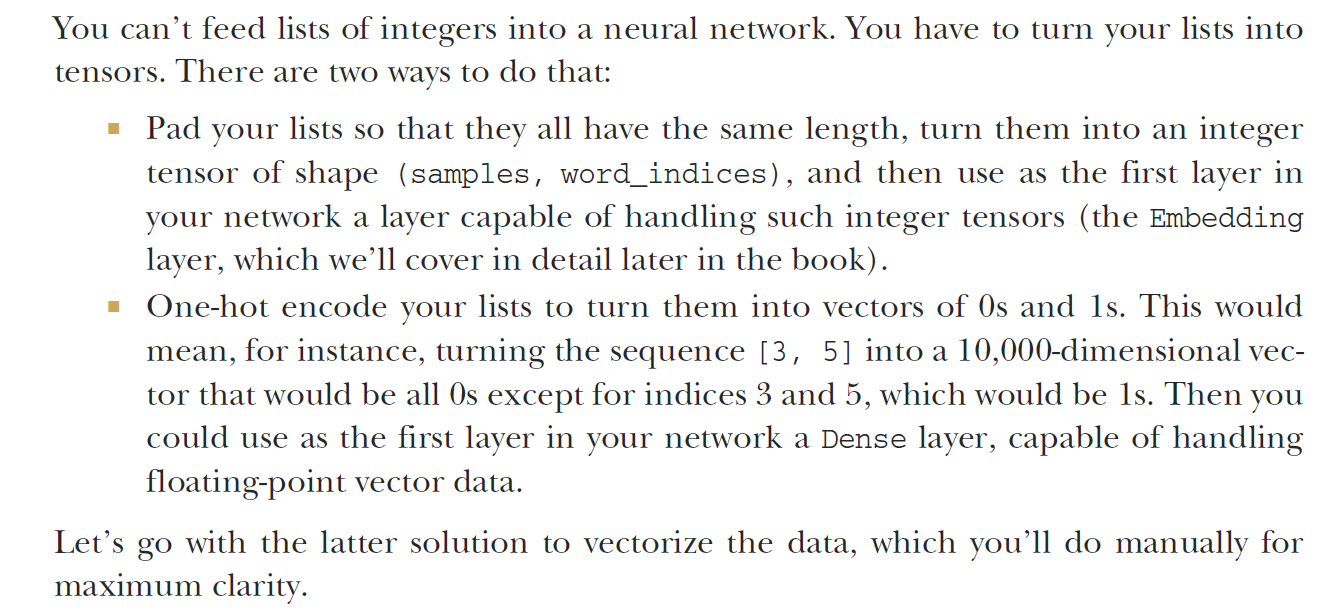

In [30]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
from keras import models
from keras import layers

In [51]:
model = models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
#from keras import optimizers
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [54]:
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [55]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.5323 - acc: 0.7857 - val_loss: 0.4099 - val_acc: 0.8609
Epoch 2/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.3236 - acc: 0.8993 - val_loss: 0.3121 - val_acc: 0.8878
Epoch 3/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.2317 - acc: 0.9262 - val_loss: 0.3067 - val_acc: 0.8736
Epoch 4/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1806 - acc: 0.9403 - val_loss: 0.2721 - val_acc: 0.8916
Epoch 5/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.1471 - acc: 0.9522 - val_loss: 0.2943 - val_acc: 0.8827
Epoch 6/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.1195 - acc: 0.9632 - val_loss: 0.2975 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1010 - acc: 0.9693 - val_loss: 0.3420 - 

**Note that the call to model.fit() returns a History object. This object has a member
history, which is a dictionary containing data about everything that happened
during training. Let’s look at it:**

In [56]:
history_dict = history.history

In [57]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

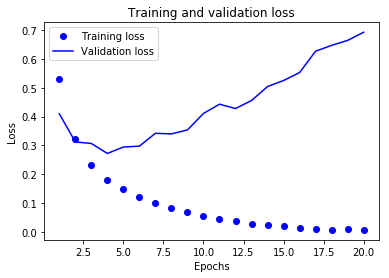

In [58]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

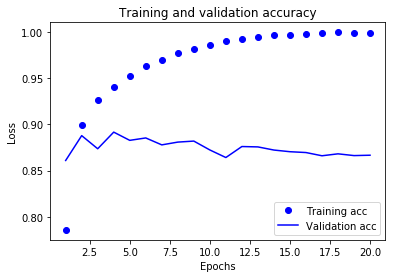

In [60]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512)

Epoch 1/4
15000/15000 [==============================] - 2s 143us/step - loss: 0.5169 - acc: 0.7888
Epoch 2/4
15000/15000 [==============================] - 2s 112us/step - loss: 0.3173 - acc: 0.9019
Epoch 3/4
15000/15000 [==============================] - 2s 118us/step - loss: 0.2304 - acc: 0.9260
Epoch 4/4
15000/15000 [==============================] - 2s 127us/step - loss: 0.1816 - acc: 0.9414


In [70]:
pred=model.predict(x_test)
pred1 = [1 if x>0.5 else 0 for x in pred]

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,pred1)

0.87596